# Lab 3: Data Preprocessing

In this assignment, we will learn how to explore the raw data and preprocess it. 

The dataset we are going to exlore is an insurance data. It provides different features of each user as follows:
* age: age of the user
* sex: gender of the user
* bmi: body mass index, providing an understanding of body
* children: number of children covered by health insurance / number of dependents
* smoker: smoker or not
* region: the user's residential area in the US, northeast, southeast, southwest, northwest.

Additionally, the medical cost of each user is also provided: 
* charges: the medical cost 

Please follow Lecture 5_data_understanding and Lecture 6_data_preprocessing to complete following questions. 

### Q1. Load data with Pandas and output the basic information of this dataset, such as the features and their data types.  Which features are numerical features and which users are categorical features?


In [1]:
# your code
import pandas as pd

df = pd.read_csv('insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Q2. Check whether there are missing values in this dataset.

In [2]:
# your code
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Q3. Visualize all numerical features with histogram plot to see the distribution of each numerical feature. 


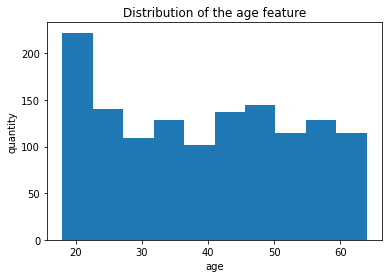

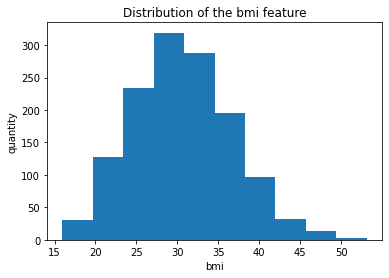

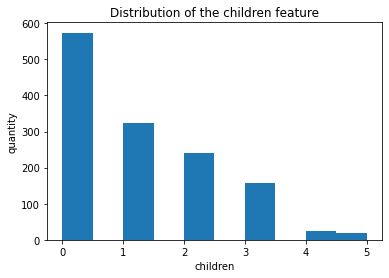

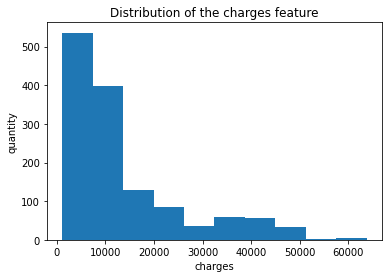

In [3]:
# your code
import matplotlib.pyplot as plt
plt.hist(df['age'])
plt.title("Distribution of the age feature")
plt.xlabel('age')
plt.ylabel('quantity')
plt.figure()
plt.hist(df['bmi'])
plt.title("Distribution of the bmi feature")
plt.xlabel('bmi')
plt.ylabel('quantity')
plt.figure()
plt.hist(df['children'])
plt.title("Distribution of the children feature")
plt.xlabel('children')
plt.ylabel('quantity')
plt.figure()
plt.hist(df['charges'])
plt.title("Distribution of the charges feature")
plt.xlabel('charges')
plt.ylabel('quantity')
plt.show()


### Q4. Use corr() function of Pandas to show the correlation between different numerical features

In [5]:
# your code
hcorr = df.corr()
hcorr.style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Q5. For all categorical features, use bar plot to visualize the number of users within each category.

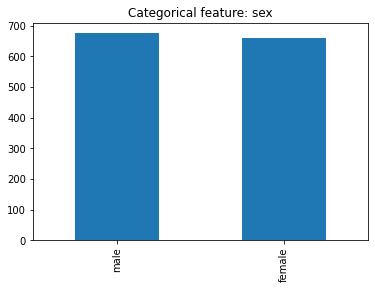

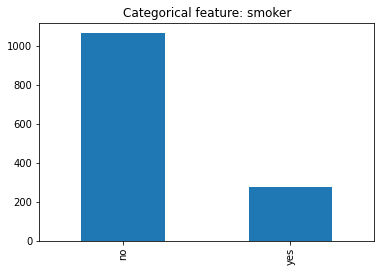

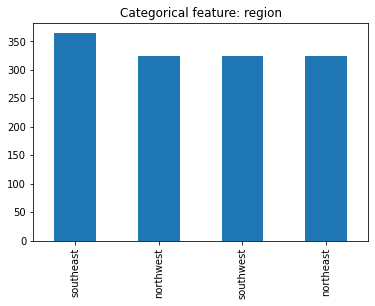

In [6]:
# your code
df['sex'].value_counts().plot(kind='bar')
plt.title("Categorical feature: sex")
plt.figure()
df['smoker'].value_counts().plot(kind='bar')
plt.title("Categorical feature: smoker")
plt.figure()
df['region'].value_counts().plot(kind='bar')
plt.title("Categorical feature: region")
plt.show()

### Q6. Convert all categorical features into numerical features with Label Encoding or One-Hot Encoding

In [7]:
# your code
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['sex'] = labelencoder.fit_transform(df['sex'])
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df['region'] = labelencoder.fit_transform(df['region'])
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64
1    676
0    662
Name: sex, dtype: int64
0    1064
1     274
Name: smoker, dtype: int64
2    364
3    325
1    325
0    324
Name: region, dtype: int64


### Q7. Normalize all numerical features

In [8]:
# your code
import numpy as np
from sklearn.preprocessing import OneHotEncoder
np.set_printoptions(precision=4)
X1 = df['age'].astype(dtype=np.float32)
X2 = df['bmi'].astype(dtype=np.float32)
X3 = df['children'].astype(dtype=np.float32)
X4 = df['charges'].astype(dtype=np.float32)
X = np.stack((X1, X2, X3, X4))
X = np.transpose(X)
print('Original data:')
print(X)
x_mean = np.mean(X, axis=0)
x_std = np.std(X, axis=0)
print('Mean and Std:')
print(x_mean)
print(x_std)
X = (X-x_mean)/x_std
print('Scaling data:')
print(X)

Original data:
[[1.9000e+01 2.7900e+01 0.0000e+00 1.6885e+04]
 [1.8000e+01 3.3770e+01 1.0000e+00 1.7256e+03]
 [2.8000e+01 3.3000e+01 3.0000e+00 4.4495e+03]
 ...
 [1.8000e+01 3.6850e+01 0.0000e+00 1.6298e+03]
 [2.1000e+01 2.5800e+01 0.0000e+00 2.0079e+03]
 [6.1000e+01 2.9070e+01 0.0000e+00 2.9141e+04]]
Mean and Std:
[3.9207e+01 3.0663e+01 1.0949e+00 1.3270e+04]
[1.4045e+01 6.0959e+00 1.2050e+00 1.2105e+04]
Scaling data:
[[-1.4388 -0.4533 -0.9086  0.2986]
 [-1.51    0.5096 -0.0788 -0.9537]
 [-0.798   0.3833  1.5809 -0.7287]
 ...
 [-1.51    1.0149 -0.9086 -0.9616]
 [-1.2964 -0.7978 -0.9086 -0.9304]
 [ 1.5517 -0.2614 -0.9086  1.3111]]


### Q8. Save your preprocessed data into a csv file. Submit your code and the preprocessed data.

In [18]:
import csv
d1 = df['sex'].to_numpy()
d2 = df['smoker'].to_numpy()
d3 = df['region'].to_numpy()
fn = 'preprocessedInsurance.csv'
with open(fn, 'w', newline= '') as csvfile:
    csvWriter = csv.writer(csvfile)
    csvWriter.writerow(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])
    for row_index in range(X.shape[0]):
        one_complete_row = []
        one_complete_row.append(X[row_index][0])
        one_complete_row.append(d1[row_index])
        one_complete_row.append(X[row_index][1])
        one_complete_row.append(X[row_index][2])
        one_complete_row.append(d2[row_index])
        one_complete_row.append(d3[row_index])
        one_complete_row.append(X[row_index][3])
        csvWriter.writerow(one_complete_row)
        one_complete_row = []    
    